In [50]:
import pandas as pd
import numpy as np
import requests
import io

In [2]:
Download_root = "https://raw.githubusercontent.com/PakawanPim/Week2DataSets/main/" # Make sure the url is the raw version of the file on GitHub

# URL name
city_url = Download_root+'City.csv'
customer_url = Download_root+'Customer_ID.csv'
transac_url = Download_root+'Transaction_ID.csv'

# Request for each URL
city_data = requests.get(city_url).content
customer_data = requests.get(customer_url).content
transac_data = requests.get(transac_url).content

# Reading the downloaded content and turning it into a pandas dataframe
cab_df = pd.read_csv("C:/Users/pumpim/Downloads/Cab_Data.csv") # from local storage
city_df = pd.read_csv(io.StringIO(city_data.decode('utf-8')))
customer_df = pd.read_csv(io.StringIO(customer_data.decode('utf-8')))
transac_df = pd.read_csv(io.StringIO(transac_data.decode('utf-8')))


In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [4]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
cab_df['Date of Travel'] =  pd.to_datetime(cab_df['Date of Travel'])
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [6]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [7]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
transac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [11]:
transac_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Preparing Data

### Creating master data 
- Combine Customer_ID table with Transaction_ID table by 'Customer ID'
- Join Transaction_ID table with Cab_data table by 'Transaction ID'
- Join City table with Cab_data table by 'City'

In [12]:
# Combine Customer_ID table with Transaction_ID table by 'Customer ID'
transac_customer = pd.merge(transac_df, customer_df, how = 'left', on = 'Customer ID')

In [13]:
transac_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Transaction ID      440098 non-null  int64 
 1   Customer ID         440098 non-null  int64 
 2   Payment_Mode        440098 non-null  object
 3   Gender              440098 non-null  object
 4   Age                 440098 non-null  int64 
 5   Income (USD/Month)  440098 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 23.5+ MB


In [14]:
# Join Transaction_ID table with Cab_data table by 'Transaction ID'
cab_transac = pd.merge(cab_df, transac_customer, how = 'left', on = 'Transaction ID')
cab_transac.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [15]:
cab_transac.shape

(359392, 12)

In [16]:
# Join City table with Cab_data table by 'City'
cab_city = pd.merge(cab_transac, city_df, how = 'left', on = 'City')
# cab_city.head()

In [17]:
cab_city.shape

(359392, 14)

In [18]:
Master_cab = cab_city

In [19]:
# Master dataset called Master_cab
Master_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [55]:
Master_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [54]:
Master_cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


### Identify and remove duplicates

In [20]:
Master_cab[Master_cab.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users


No duplicated rows were found

## Analysis

#### NA value and outlier detection

In [21]:
Master_cab.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

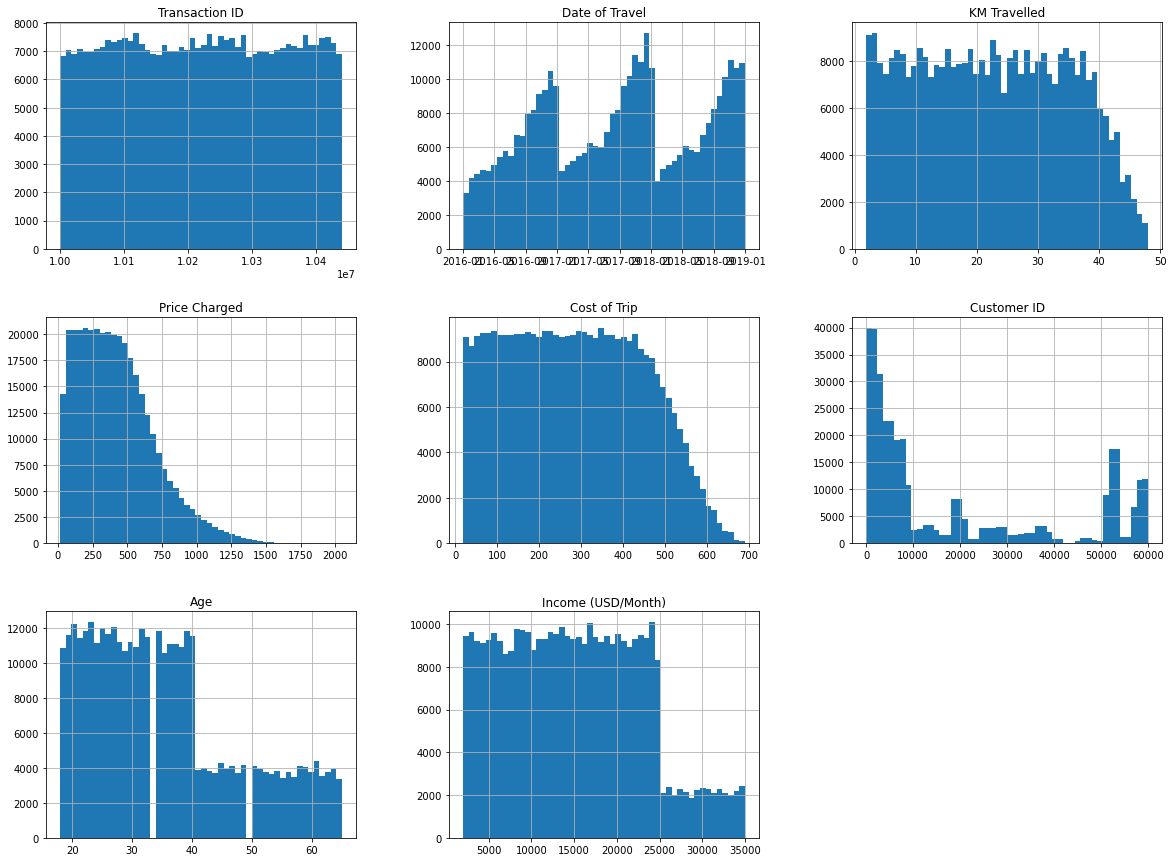

In [22]:
# Plot histogram
%matplotlib inline 
# this magic command tell jupyter to set up matplotlib and use its own backend
import matplotlib.pyplot as plt
Master_cab.hist(bins=50, figsize=(20,15))
plt.show()

In [39]:
Master_cab.shape

(359392, 14)

<AxesSubplot:>

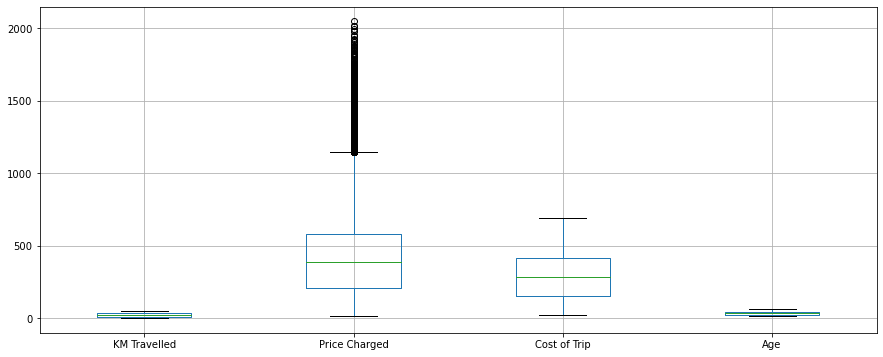

In [43]:
Master_cab[["KM Travelled", "Price Charged", "Cost of Trip", "Age"]].boxplot(figsize=(15,6))

#### Correlation

In [46]:
import seaborn as sns

<AxesSubplot:>

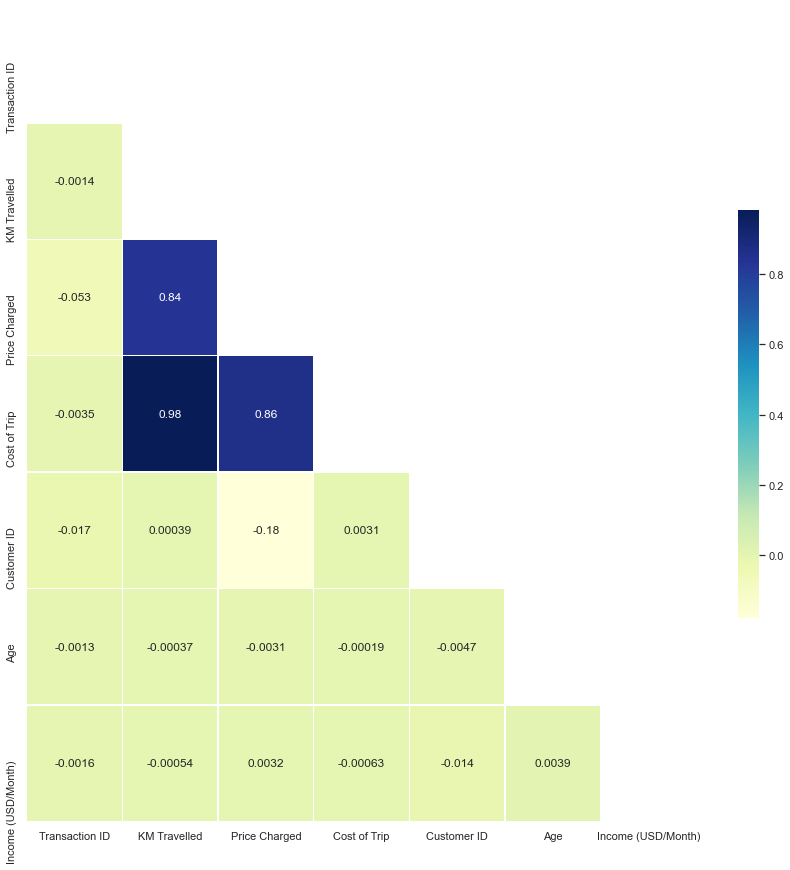

In [53]:
sns.set_theme(style="white")
corr=Master_cab.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap="YlGnBu",annot=True, linewidths=.5, cbar_kws={"shrink": .5})

Summary

## Hypothesis
1. Which company has maximum cab users at a particular time period?
2. Does margin proportionally increase with increase in number of customers?
3. What are the attributes of these customer segments?
4. 
5. 

### 1. Which company has maximum cab users at a particular time period?

<AxesSubplot:xlabel='Company', ylabel='Customer ID'>

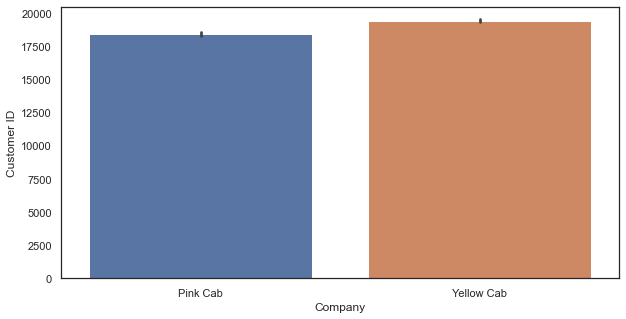

In [66]:
plt.figure(figsize = (10, 5))
sns.barplot(data = Master_cab, x = 'Company', y = 'Customer ID')

In [91]:
# df = Master_cab[['Date of Travel','Customer ID', 'Company']].groupby(Master_cab['Date of Travel']).count()
Master_cab[['Date of Travel','Customer ID', 'Company']]
# plt.figure(figsize = (10, 5))
# sns.scatterplot(data = Master_cab, x = 'Date of Travel', y = '', hue = 'Company')

,Date of Travel,Customer ID,Company
0,2016-01-08,29290,Pink Cab
1,2016-01-06,27703,Pink Cab
2,2016-01-02,28712,Pink Cab
3,2016-01-07,28020,Pink Cab
4,2016-01-03,27182,Pink Cab
...,...,...,...
359387,2018-01-08,52392,Yellow Cab
359388,2018-01-04,53286,Yellow Cab
359389,2018-01-05,52265,Yellow Cab
359390,2018-01-05,52175,Yellow Cab
